# **PROYECTO ROBOT TRADING**

# **ROBOT TRADING**

Descripcion del Proyecto
Vamos a desarrollar un Robot Trading en Python que pueda tomar decisiones de compra y venta de Bitcoin en tiempo real. ¿Te parece interesante? A continuación, te proporcionamos una guía detallada de los pasos que deberás seguir para llevar a cabo este emocionante proyecto.

Paso 1: Configuración del Ambiente

Aqui se realizara:

1.1 Validación de la versión de Python.

1.2 Importación las librerías necesarias.

Paso 2: Obtención de Datos

Aqui se realizara:

2.1 Vamos a crear la función import_bitcoin_database() para obtener los datos históricos de Bitcoin y mostrar una muestra de estos datos.

2.2 Usar la API de CoinGecko para obtener el precio actual del Bitcoin y su tendencia de manera más fiable.

Paso 3: Limpieza de Datos

Aqui se realizara:

3.1 Exploración de los Datos.

3.2: Limpieza de los Datos.

Paso 4: Toma de Decisiones

Aqui se realizara:

4.1 Función para la toma de decisiones.

Paso 5: Visualización

Aqui se realizara:

5.1 Función para la visualización de datos.

Paso 6: Automatización

6.1 Automatización del Proceso.

Adicional
Paso 7: Añadir Medias Móviles

Aqui se realizara:

7.1 Vamos a calcular dos medias móviles.

7.2 Mejorar la Toma de Decisiones con Medias Móviles.

7.3 Actualización de la Visualización

Paso 8: Añadir el RS

Aqui se realizara:

8.1 Calcular el RSI

8.2 Actualización de la Visualización para Incluir RSI

# **Paso 1: Configuración del Ambiente**


**1.1 Validación de la versión de Python.**

In [42]:
# Comando para mostrar la versión instalada de Python
!python -V

Python 3.10.12


**1.2 Importación las librerías necesarias.**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
from bs4 import BeautifulSoup
import requests

# **Paso 2: Obtención de Datos**

**2.1 Vamos a crear la función import_bitcoin_database() para obtener los datos históricos de Bitcoin y mostrar una muestra de estos datos.**

In [44]:
# Función para obtener los datos históricos de Bitcoin
def import_bitcoin_database():
    global df_bitcoin
    end_date = datetime.datetime.now()
    start_date = end_date - datetime.timedelta(days=7)
    df_bitcoin = yf.download("BTC-USD", start_date, end_date, interval="5m")

# Ejecución de la función
import_bitcoin_database()

# Mostrar una muestra de los datos
print(df_bitcoin.head(15))

[*********************100%%**********************]  1 of 1 completed

                                   Open          High           Low  \
Datetime                                                              
2024-07-01 13:55:00+00:00  62570.121094  62625.750000  62532.984375   
2024-07-01 14:00:00+00:00  62691.441406  62691.441406  62612.863281   
2024-07-01 14:05:00+00:00  62673.058594  62786.582031  62673.058594   
2024-07-01 14:10:00+00:00  62681.699219  62681.699219  62586.984375   
2024-07-01 14:15:00+00:00  62559.375000  62627.593750  62559.375000   
2024-07-01 14:20:00+00:00  62671.328125  62671.328125  62622.210938   
2024-07-01 14:25:00+00:00  62734.292969  62747.710938  62726.941406   
2024-07-01 14:30:00+00:00  62728.351562  62753.953125  62728.351562   
2024-07-01 14:35:00+00:00  62739.265625  62769.718750  62728.242188   
2024-07-01 14:40:00+00:00  62812.898438  62812.898438  62769.390625   
2024-07-01 14:45:00+00:00  62766.640625  62766.640625  62716.015625   
2024-07-01 14:50:00+00:00  62773.269531  62773.269531  62714.082031   
2024-0

**2.2 Usar la API de CoinGecko para obtener el precio actual del Bitcoin y su tendencia de manera más fiable.**

In [45]:
# Función para obtener la tendencia actual del Bitcoin
!pip install pycoingecko
from pycoingecko import CoinGeckoAPI

def trends_extract():
    global actual_price, trend
    cg = CoinGeckoAPI()
    bitcoin_data = cg.get_price(ids='bitcoin', vs_currencies='usd', include_market_cap=True, include_24hr_change=True)

    actual_price = bitcoin_data['bitcoin']['usd']
    trend_change = bitcoin_data['bitcoin']['usd_24h_change']

    if trend_change > 0:
        trend = "High"
    else:
        trend = "Low"

# Ejecución de la función
trends_extract()

# Impresión de las variables necesarias para validación
print("Precio actual del Bitcoin: " + str(actual_price))
print("La tendencia actual del Bitcoin es: " + trend)


Precio actual del Bitcoin: 56834
La tendencia actual del Bitcoin es: Low


# **Paso 3: Limpieza de Datos**

**3.1 Exploración de los Datos.**

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2016 entries, 2024-07-01 13:55:00+00:00 to 2024-07-08 13:50:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2016 non-null   float64
 1   High       2016 non-null   float64
 2   Low        2016 non-null   float64
 3   Close      2016 non-null   float64
 4   Adj Close  2016 non-null   float64
 5   Volume     2016 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.2 KB


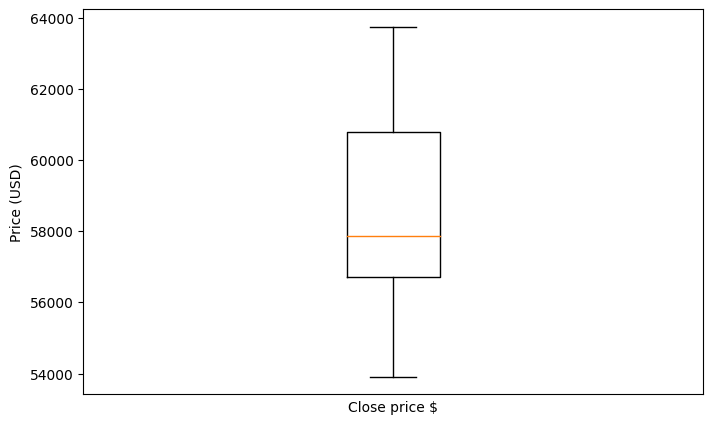

In [46]:
# Exploración de los Datos
# Mostrar un resumen breve del tipo de datos que contiene nuestro DataFrame, número de datos, columnas, así como datos erróneos o nulos
df_bitcoin.info()

# Ejecución de algunas estadísticas descriptivas para entender numéricamente la distribución de nuestros datos
df_bitcoin.describe()

# Mostrar una gráfica de caja para una rápida comprensión de los datos
plt.figure(figsize=(8, 5))
plt.boxplot(df_bitcoin["Close"])
plt.xlabel("Close price $")
plt.ylabel("Price (USD)")
plt.xticks([])
plt.show()


**3.2: Limpieza de los Datos.**

In [47]:
# Limpieza de los Datos
def data_cleaning():
    global df_clean_bitcoin, bitcoin_mean

    # Crear una copia del DataFrame original
    df_clean_bitcoin = df_bitcoin.copy()
    df_clean_bitcoin = df_clean_bitcoin.reset_index()

    # Eliminar duplicados en el atributo "Datetime"
    df_clean_bitcoin = df_clean_bitcoin.drop_duplicates(subset=["Datetime"])

    # Eliminar valores nulos en la columna "Close"
    df_clean_bitcoin = df_clean_bitcoin[df_clean_bitcoin.Close.notnull()]

    # Eliminar filas con volumen de transacción igual a 0
    df_clean_bitcoin = df_clean_bitcoin[df_clean_bitcoin["Volume"] > 0]

    # Filtrar registros cuyo precio ("Close") se encuentre entre el 1er cuartil (Q1) y el 3er cuartil (Q3)
    Q1 = df_clean_bitcoin["Close"].quantile(0.25)
    Q3 = df_clean_bitcoin["Close"].quantile(0.75)
    IQR = Q3 - Q1
    df_clean_bitcoin = df_clean_bitcoin[(df_clean_bitcoin["Close"] >= Q1 - 1.5 * IQR) & (df_clean_bitcoin["Close"] <= Q3 + 1.5 * IQR)]
    df_clean_bitcoin = df_clean_bitcoin.reset_index(drop=True)

    # Calcular el precio promedio del Bitcoin
    bitcoin_mean = df_clean_bitcoin["Close"].mean()

# Ejecución de la función de limpieza de datos
data_cleaning()

# Impresión del valor promedio de cierre
print("El valor promedio de cierre es: " + str(bitcoin_mean))

# Impresión del DataFrame resultante de la limpieza de datos
print(df_clean_bitcoin.head(15))

El valor promedio de cierre es: 58577.06447134445
                    Datetime          Open          High           Low  \
0  2024-07-01 14:00:00+00:00  62691.441406  62691.441406  62612.863281   
1  2024-07-01 14:05:00+00:00  62673.058594  62786.582031  62673.058594   
2  2024-07-01 14:10:00+00:00  62681.699219  62681.699219  62586.984375   
3  2024-07-01 14:15:00+00:00  62559.375000  62627.593750  62559.375000   
4  2024-07-01 14:20:00+00:00  62671.328125  62671.328125  62622.210938   
5  2024-07-01 14:25:00+00:00  62734.292969  62747.710938  62726.941406   
6  2024-07-01 14:30:00+00:00  62728.351562  62753.953125  62728.351562   
7  2024-07-01 14:35:00+00:00  62739.265625  62769.718750  62728.242188   
8  2024-07-01 14:40:00+00:00  62812.898438  62812.898438  62769.390625   
9  2024-07-01 14:45:00+00:00  62766.640625  62766.640625  62716.015625   
10 2024-07-01 14:50:00+00:00  62773.269531  62773.269531  62714.082031   
11 2024-07-01 14:55:00+00:00  62727.281250  62767.187500  6271

# **Paso 4: Toma de Decisiones**

**4.1 Función para la toma de decisiones.**

In [48]:
# Toma de Decisiones
def decision():
    global decision_algorithm, marker, marker_color

    if actual_price >= bitcoin_mean and trend == "Low":
        decision_algorithm = "Sell"
        marker = "v"
        marker_color = "Red"
    elif actual_price < bitcoin_mean and trend == "High":
        decision_algorithm = "Buy"
        marker = "^"
        marker_color = "Black"
    else:
        decision_algorithm = "Wait"
        marker = ">"
        marker_color = "Purple"

# Ejecución de la función
decision()

# Impresión de la decisión resultante
print("La decisión resultante fue: " + decision_algorithm)
print("Nuestra tendencia tiene dirección: " + marker)
print("El color decidido fue: " + marker_color)

La decisión resultante fue: Wait
Nuestra tendencia tiene dirección: >
El color decidido fue: Purple


# **Paso 5: Visualización**

**5.1 Función para la visualización de datos.**

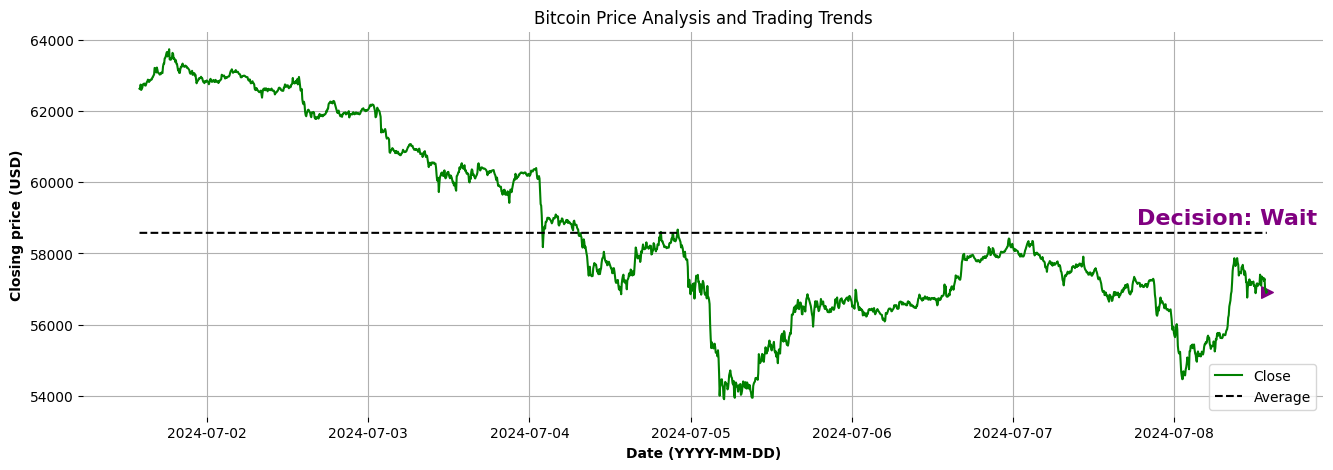

In [49]:
#Visualización
def data_visualization():
    global df_bitGraph

    # Generamos un DataFrame para trabajar la representación gráfica.
    df_bitGraph = df_bitcoin.copy()

    # Añadimos una columna que contenga el valor promedio.
    df_bitGraph["Average"] = bitcoin_mean

    # Creamos el lienzo de nuestra gráfica.
    plt.rc("figure", figsize = (16,5))

    # Graficamos el valor de cierre, con relación al índice.
    plt.plot(df_bitGraph.index, df_bitcoin["Close"], label="Close", color = "green")

    # Ahora graficamos el promedio, igualmente versus el índice.
    plt.plot(df_bitGraph.index, df_bitGraph["Average"], label="Average", color="black", linestyle = "--")

    # Agregamos una representación distinta al último valor obtenido.
    # Obtenemos el último valor del índice
    last_index = df_bitGraph.index[-1]

    # Último valor en la columna de cierre de precio.
    last_close = df_bitGraph['Close'].iloc[-1]

    # Graficamos el último punto, con una forma y orientación distinta así como su color según tendencia.
    plt.scatter(last_index, last_close, color=marker_color, marker=marker, s=70)

    # PARTE VISUAL DEL GRÁFICO.

    # Eliminamos las líneas del borde del gráfico
    ax = plt.gca()
    ax.spines["right"].set_color("None")
    ax.spines["top"].set_color("None")
    ax.spines["bottom"].set_color("None")
    ax.spines["left"].set_color("None")

    # Visualizamos la cuadrícula del gráfico.
    plt.grid(visible=True)

    # Actualizamos el título.
    plt.title("Bitcoin Price Analysis and Trading Trends")

    # Actualizamos el nombre del eje X.
    plt.xlabel('Date (YYYY-MM-DD)', fontdict={"weight":"bold"})

    # Actualizamos el nombre del eje Y.
    plt.ylabel('Closing price (USD)', fontdict={"weight":"bold"})

    # Generamos la leyenda y ajustamos su posición.
    plt.legend(loc="lower right")

    # Mostramos en el gráfico cual fue la decisión resultante de nuestro algoritmo para esta muestra de datos.
    plt.annotate("Decision: "+decision_algorithm, xy=(.85, 0.5), xycoords='axes fraction', fontsize=16, color='purple', weight = "bold")

    # Graficamos.
    plt.show()

# Ejecución de la función
data_visualization()

# **Paso 6: Automatización**

**6.1 Automatización del Proceso.**

[*********************100%%**********************]  1 of 1 completed


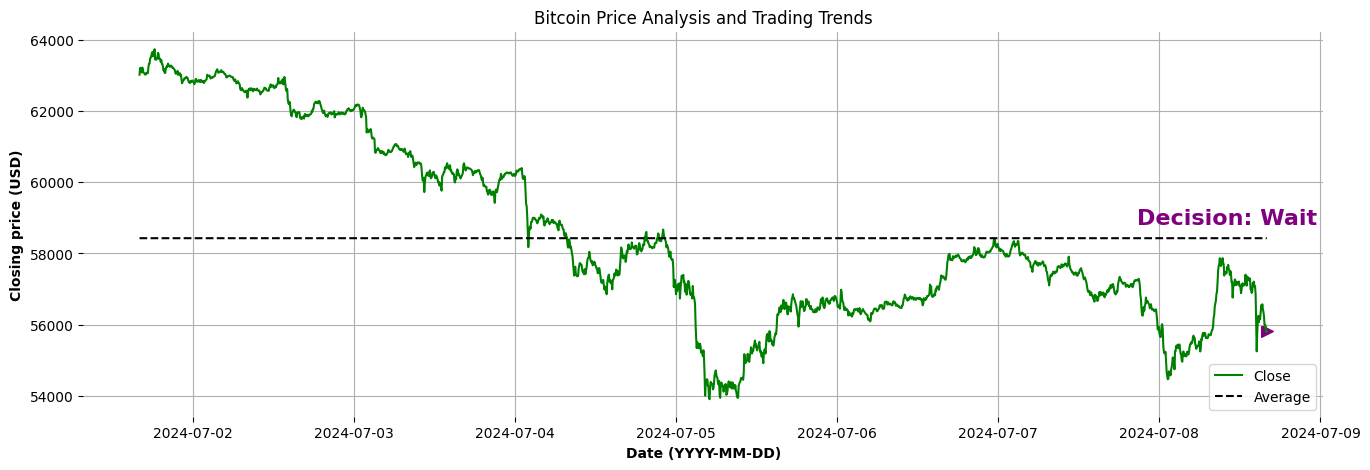

In [ ]:
# Automatización
from IPython.display import clear_output
import time

while True:
    clear_output(wait=True)
    import_bitcoin_database()  # Importamos los datos desde yfinance
    trends_extract()           # Web scraping de la página web o uso de la API
    data_cleaning()            # Limpieza de datos
    decision()                 # Algoritmo de decisión
    data_visualization()       # Representación gráfica de la información
    time.sleep(300)            # Tiempo de espera antes de volver a iniciar el ciclo (5 minutos)

# ***ADICIONAL***

# **Adicional Paso 7: Añadir Medias Móviles**

**7.1 Vamos a calcular dos medias móviles.**

In [51]:
# Añadir Medias Móviles
def add_moving_averages(df):
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    return df

# Añadir medias móviles al DataFrame limpio
df_clean_bitcoin = add_moving_averages(df_clean_bitcoin)

# Mostrar las primeras filas del DataFrame actualizado
print(df_clean_bitcoin.head(15))

                    Datetime          Open          High           Low  \
0  2024-07-01 14:05:00+00:00  62673.058594  62786.582031  62673.058594   
1  2024-07-01 14:10:00+00:00  62681.699219  62681.699219  62586.984375   
2  2024-07-01 14:15:00+00:00  62559.375000  62627.593750  62559.375000   
3  2024-07-01 14:20:00+00:00  62671.328125  62671.328125  62622.210938   
4  2024-07-01 14:25:00+00:00  62734.292969  62747.710938  62726.941406   
5  2024-07-01 14:30:00+00:00  62728.351562  62753.953125  62728.351562   
6  2024-07-01 14:35:00+00:00  62739.265625  62769.718750  62728.242188   
7  2024-07-01 14:40:00+00:00  62812.898438  62812.898438  62769.390625   
8  2024-07-01 14:45:00+00:00  62766.640625  62766.640625  62716.015625   
9  2024-07-01 14:50:00+00:00  62773.269531  62773.269531  62714.082031   
10 2024-07-01 14:55:00+00:00  62727.281250  62767.187500  62719.726562   
11 2024-07-01 15:00:00+00:00  62745.304688  62810.289062  62745.304688   
12 2024-07-01 15:05:00+00:00  62845.73

**7.2 Mejorar la Toma de Decisiones con Medias Móviles.**

In [52]:
# Mejorar la Toma de Decisiones con Medias Móviles
def decision_with_moving_averages():
    global decision_algorithm, marker, marker_color

    current_price = df_clean_bitcoin["Close"].iloc[-1]
    sma_20 = df_clean_bitcoin["SMA_20"].iloc[-1]
    sma_50 = df_clean_bitcoin["SMA_50"].iloc[-1]

    if current_price > sma_20 and current_price > sma_50:
        decision_algorithm = "Buy"
        marker = "^"
        marker_color = "Black"
    elif current_price < sma_20 and current_price < sma_50:
        decision_algorithm = "Sell"
        marker = "v"
        marker_color = "Red"
    else:
        decision_algorithm = "Wait"
        marker = ">"
        marker_color = "Purple"

# Ejecución de la función mejorada
decision_with_moving_averages()

# Impresión de la decisión resultante
print("La decisión resultante fue: " + decision_algorithm)
print("Nuestra tendencia tiene dirección: " + marker)
print("El color decidido fue: " + marker_color)

La decisión resultante fue: Sell
Nuestra tendencia tiene dirección: v
El color decidido fue: Red


**7.3 Actualización de la Visualización.**

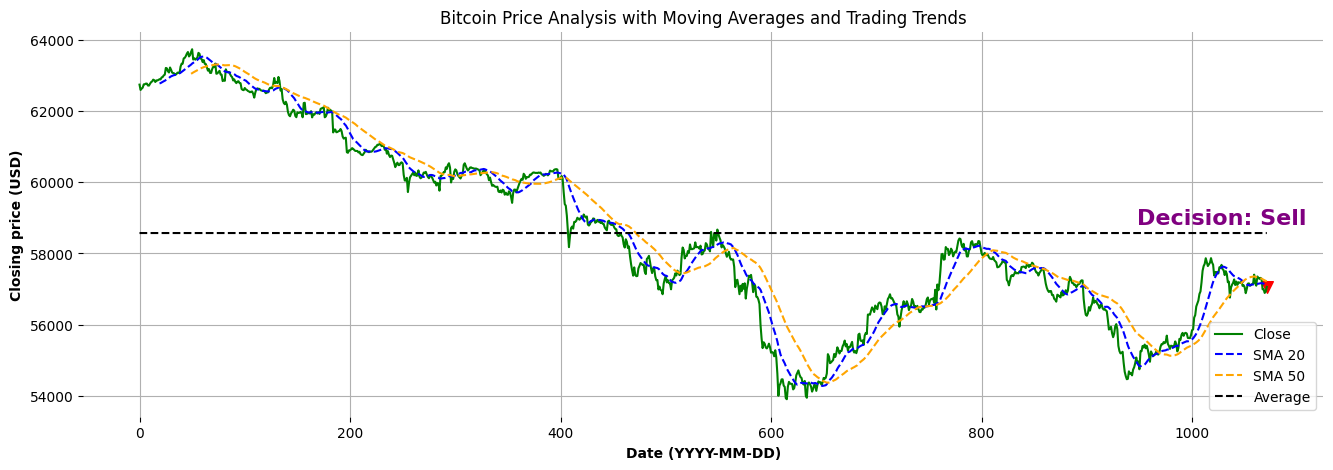

In [53]:
# Actualización de la Visualización
def data_visualization_with_moving_averages():
    global df_bitGraph

    # Generar un DataFrame para trabajar la representación gráfica.
    df_bitGraph = df_clean_bitcoin.copy()

    # Crear el lienzo de nuestra gráfica.
    plt.rc("figure", figsize=(16, 5))

    # Graficar el valor de cierre.
    plt.plot(df_bitGraph.index, df_bitGraph["Close"], label="Close", color="green")

    # Graficar las medias móviles.
    plt.plot(df_bitGraph.index, df_bitGraph["SMA_20"], label="SMA 20", color="blue", linestyle="--")
    plt.plot(df_bitGraph.index, df_bitGraph["SMA_50"], label="SMA 50", color="orange", linestyle="--")

    # Graficar el promedio.
    plt.plot(df_bitGraph.index, [bitcoin_mean] * len(df_bitGraph), label="Average", color="black", linestyle="--")

    # Representación del último valor obtenido.
    last_index = df_bitGraph.index[-1]
    last_close = df_bitGraph['Close'].iloc[-1]
    plt.scatter(last_index, last_close, color=marker_color, marker=marker, s=70)

    # Parte visual del gráfico.
    ax = plt.gca()
    ax.spines["right"].set_color("None")
    ax.spines["top"].set_color("None")
    ax.spines["bottom"].set_color("None")
    ax.spines["left"].set_color("None")

    # Visualizar la cuadrícula del gráfico.
    plt.grid(visible=True)

    # Actualizar el título.
    plt.title("Bitcoin Price Analysis with Moving Averages and Trading Trends")

    # Actualizar el nombre del eje X.
    plt.xlabel('Date (YYYY-MM-DD)', fontdict={"weight": "bold"})

    # Actualizar el nombre del eje Y.
    plt.ylabel('Closing price (USD)', fontdict={"weight": "bold"})

    # Generar la leyenda y ajustar su posición.
    plt.legend(loc="lower right")

    # Mostrar en el gráfico cuál fue la decisión resultante de nuestro algoritmo para esta muestra de datos.
    plt.annotate("Decision: " + decision_algorithm, xy=(.85, 0.5), xycoords='axes fraction', fontsize=16, color='purple', weight="bold")

    # Graficar.
    plt.show()

# Ejecución de la función actualizada
data_visualization_with_moving_averages()

# **Paso 8: Añadir el RS**


8.1 Calcular el RSI. **texto en negrita**

In [54]:
# Añadir el RSI
def calculate_rsi(df, window=14):
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    df['RSI'] = rsi
    return df

# Calcular el RSI y añadirlo al DataFrame limpio
df_clean_bitcoin = calculate_rsi(df_clean_bitcoin)

# Mostrar las primeras filas del DataFrame actualizado
print(df_clean_bitcoin.head(15))

                    Datetime          Open          High           Low  \
0  2024-07-01 14:05:00+00:00  62673.058594  62786.582031  62673.058594   
1  2024-07-01 14:10:00+00:00  62681.699219  62681.699219  62586.984375   
2  2024-07-01 14:15:00+00:00  62559.375000  62627.593750  62559.375000   
3  2024-07-01 14:20:00+00:00  62671.328125  62671.328125  62622.210938   
4  2024-07-01 14:25:00+00:00  62734.292969  62747.710938  62726.941406   
5  2024-07-01 14:30:00+00:00  62728.351562  62753.953125  62728.351562   
6  2024-07-01 14:35:00+00:00  62739.265625  62769.718750  62728.242188   
7  2024-07-01 14:40:00+00:00  62812.898438  62812.898438  62769.390625   
8  2024-07-01 14:45:00+00:00  62766.640625  62766.640625  62716.015625   
9  2024-07-01 14:50:00+00:00  62773.269531  62773.269531  62714.082031   
10 2024-07-01 14:55:00+00:00  62727.281250  62767.187500  62719.726562   
11 2024-07-01 15:00:00+00:00  62745.304688  62810.289062  62745.304688   
12 2024-07-01 15:05:00+00:00  62845.73

**8.2 Actualización de la Visualización para Incluir RSI**

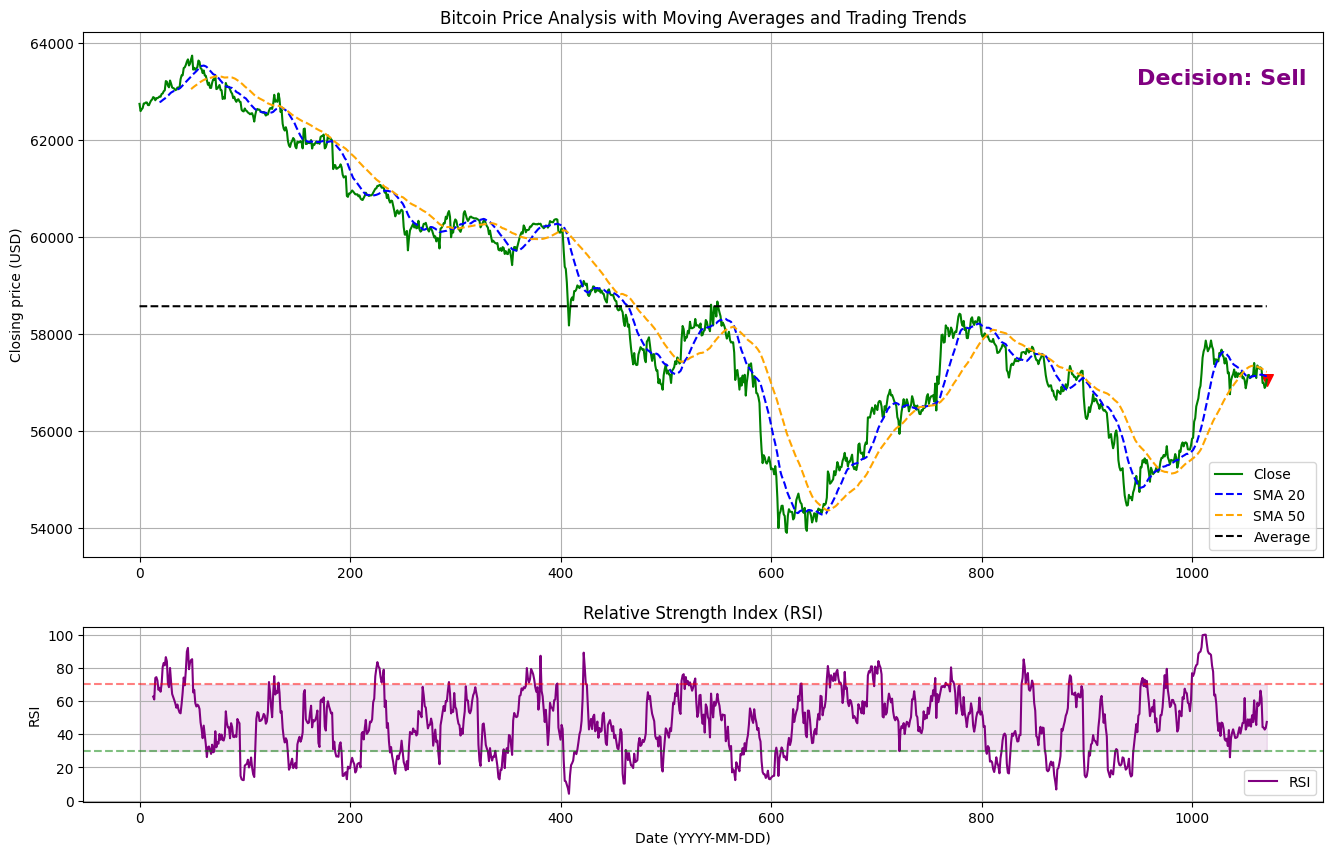

In [55]:
# Actualización de la Visualización para Incluir RSI
def data_visualization_with_rsi():
    global df_bitGraph

    # Generar un DataFrame para trabajar la representación gráfica.
    df_bitGraph = df_clean_bitcoin.copy()

    # Crear la figura y los ejes
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), gridspec_kw={'height_ratios': [3, 1]})

    # Gráfico de precios
    ax1.plot(df_bitGraph.index, df_bitGraph["Close"], label="Close", color="green")
    ax1.plot(df_bitGraph.index, df_bitGraph["SMA_20"], label="SMA 20", color="blue", linestyle="--")
    ax1.plot(df_bitGraph.index, df_bitGraph["SMA_50"], label="SMA 50", color="orange", linestyle="--")
    ax1.plot(df_bitGraph.index, [bitcoin_mean] * len(df_bitGraph), label="Average", color="black", linestyle="--")
    ax1.scatter(df_bitGraph.index[-1], df_bitGraph['Close'].iloc[-1], color=marker_color, marker=marker, s=70)

    # Configuración visual del gráfico de precios
    ax1.set_title("Bitcoin Price Analysis with Moving Averages and Trading Trends")
    ax1.set_ylabel('Closing price (USD)')
    ax1.legend(loc="lower right")
    ax1.grid(visible=True)
    ax1.annotate("Decision: " + decision_algorithm, xy=(.85, 0.9), xycoords='axes fraction', fontsize=16, color='purple', weight="bold")

    # Gráfico de RSI
    ax2.plot(df_bitGraph.index, df_bitGraph["RSI"], label="RSI", color="purple")
    ax2.axhline(70, linestyle="--", alpha=0.5, color="red")
    ax2.axhline(30, linestyle="--", alpha=0.5, color="green")
    ax2.fill_between(df_bitGraph.index, y1=70, y2=30, alpha=0.1, color='purple')

    # Configuración visual del gráfico de RSI
    ax2.set_title("Relative Strength Index (RSI)")
    ax2.set_ylabel('RSI')
    ax2.set_xlabel('Date (YYYY-MM-DD)')
    ax2.legend(loc="lower right")
    ax2.grid(visible=True)

    # Mostrar gráficos
    plt.show()

# Ejecución de la función actualizada
data_visualization_with_rsi()